In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")
df

/var/folders/zd/6f7f1lpd4l322t46rnrxl9580000gn/T/ipykernel_72497/2817589278.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060
7461191,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,6:05:15 h,NaN,FRA,NaN,F,NaN,10678.0,1073520
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150


In [4]:
# Data Cleaning

df = df[['Year of event', 'Event name','Event distance/length',	'Event number of finishers','Athlete performance','Athlete club','Athlete country','Athlete year of birth','Athlete gender','Athlete average speed']]
df = df[df['Year of event'] >= 1900]
df.dropna(subset=['Year of event', 'Event name','Event distance/length','Event number of finishers','Athlete performance','Athlete country','Athlete year of birth','Athlete gender','Athlete average speed'], inplace=True)
df

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed
0,2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,10.286
1,2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,9.501
2,2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,9.472
3,2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,8.976
4,2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,8.469
...,...,...,...,...,...,...,...,...,...,...
7461188,1995,Les 24 heures de Fleurbaix (FRA),24h,2,232.810 km,NaN,FRA,1958.0,M,9700.0
7461189,1995,Les 24 heures de Fleurbaix (FRA),24h,2,221.374 km,NaN,BEL,1951.0,M,9224.0
7461192,1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,10042.0
7461193,1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,9500.0


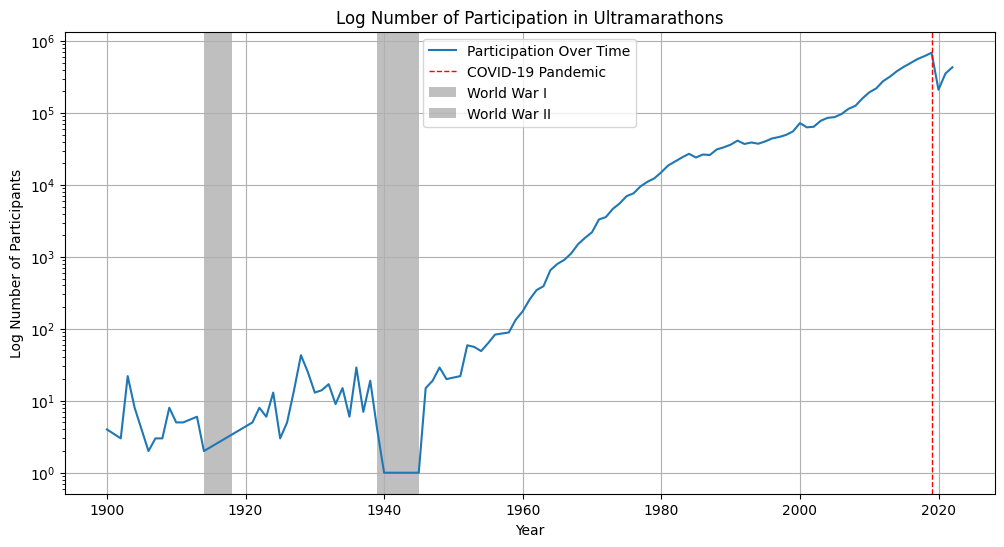

In [5]:
yearly_participation = df.groupby('Year of event').size()

plt.figure(figsize=(12, 6))

plt.plot(yearly_participation.index, yearly_participation.values, label='Participation Over Time')

plt.axvline(x=2019, color='red', linestyle='--', lw=1, label='COVID-19 Pandemic')

plt.axvspan(1914, 1918, color='grey', alpha=0.5, lw=0, label='World War I')
plt.axvspan(1939, 1945, color='grey', alpha=0.5, lw=0, label='World War II')


plt.title('Log Number of Participation in Ultramarathons')
plt.xlabel('Year')
plt.ylabel('Log Number of Participants')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()

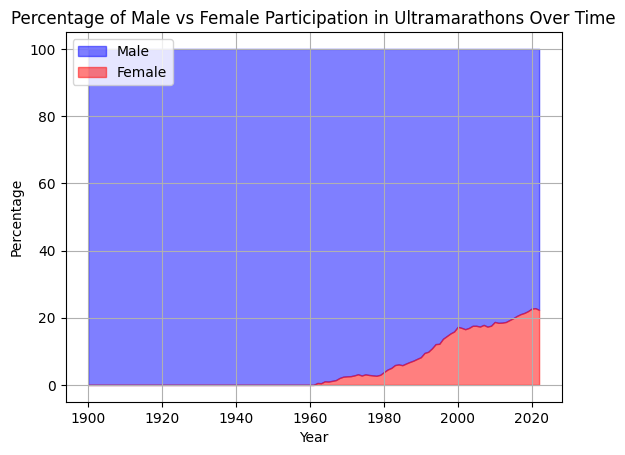

In [6]:
male_participants_per_year = df[df['Athlete gender'] == 'M'].groupby('Year of event').size()
male_percentage = (male_participants_per_year / yearly_participation) * 100
male_percentage[male_percentage.index < 1950] = 100
female_percentage = 100 - male_percentage

years = yearly_participation.index
male_percentage = male_percentage.reindex(years, fill_value=0)
female_percentage = female_percentage.reindex(years, fill_value=0)

plt.fill_between(years, female_percentage, male_percentage + female_percentage, label='Male', color='blue', alpha=0.5)
plt.fill_between(years, female_percentage, label='Female', color='red', alpha=0.5)

plt.title('Percentage of Male vs Female Participation in Ultramarathons Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

In [7]:
region_classification = {
    'North America': ['TKS','ANT','ISV','HAI','BIZ','CAY','GRL','USA', 'CAN', 'MEX', 'CRC', 'GUA', 'HON', 'DOM', 'CUB', 'TRI', 'PAN', 'BRU', 'PUR', 'BER', 'JAM', 'BAH'],
    'Europe': ['SVE','DAN','AND','BAR','Ned','swe','IVB','YUG','POL','ROU','LTU','SUI','HUN', 'GER', 'FRA', 'GBR', 'ITA', 'NED', 'BEL', 'CZE', 'AUT', 'SWE', 'UKR', 'SVK', 'MDA', 'DEN', 'FIN', 'BLR','NOR', 'IRL', 'LUX', 'ESP', 'GRE', 'POR', 'CRO', 'LIE', 'BIH', 'MNE', 'MKD', 'EST', 'LAT', 'ISL', 'MON', 'IRE', 'FRO', 'GIB', 'SER', 'SRB'],
    'Asia': ['TKM','BAN','KGZ','MAC','MDV','MGL','PAK','UZB','RUS', 'SLO', 'TPE', 'SGP', 'HKG', 'CHN', 'THA', 'MAS', 'BUL', 'SMR', 'ALB', 'JPN','KOR','IND', 'INA', 'ALG', 'IRI', 'PHI', 'VIE', 'TUR', 'CYP', 'JOR', 'NEP', 'MLT', 'KOS', 
             'KAZ', 'AZE', 'LBA', 'CPV', 'MYA', 'AFG', 'LBN', 'ARM', 'IRQ', 'BHU', 'TWN', 'GEO', 
             'KUW', 'SYR', 'NIG', 'BAH', 'YEM', 'GUM', 'SAM', 'TJK', 'LAO', 'PLE', 'UAE', 'OMA', 
             'ISR', 'QAT', 'KSA', 'BRN', 'KUW', 'LBN', 'JOR', 'SYR', 'YEM', 'IRQ', 'IRI','SRI'],
    'Africa': ['MTN','MLI','CHA','ANG','GUI','CGO','BDI','BUR','MAD','CAF','CAM','NGR', 'CMR', 'KEN', 'MAR', 'RSA', 'GAB', 'TUN', 'QAT', 'ZIM', 'MOZ', 'LES', 'MAW', 'BOT', 'NAM', 'SWZ', 'ZAM', 'MRI', 'EGY', 'ETH', 'SEN', 'SUD', 'CIV', 'SOM', 'GAM', 'COD', 'TAN', 'BEN', 'RWA', 'ERI', 'TOG', 'COM', 'UGA', 'GHA', 'LBR', 'MDG', 'STP', 'SEY', 'GRB', 'LCA', 'GBS', 'SLE'],
    'South America': ['AHO','ARU','GRN','SKN','ESA','NCA','CHI', 'ARG', 'COL', 'BRA', 'URU', 'PER', 'PAR', 'VEN', 'ECU', 'BOL', 'GUY', 'SUR'],
    'Oceania': ['ACT','AUS', 'NZL', 'FIJ', 'PNG', 'COK', 'TGA', 'SAM', 'TUV', 'VAN', 'NFI', 'PYF']
}

def classify_by_region(country):
    for region, countries in region_classification.items():
        if country in countries:
            return region
    return 'Other'  

df['Region'] = df['Athlete country'].apply(classify_by_region)
df

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Region
0,2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,10.286,South America
1,2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,9.501,South America
2,2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,9.472,South America
3,2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,8.976,South America
4,2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,8.469,South America
...,...,...,...,...,...,...,...,...,...,...,...
7461188,1995,Les 24 heures de Fleurbaix (FRA),24h,2,232.810 km,NaN,FRA,1958.0,M,9700.0,Europe
7461189,1995,Les 24 heures de Fleurbaix (FRA),24h,2,221.374 km,NaN,BEL,1951.0,M,9224.0,Europe
7461192,1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,10042.0,Europe
7461193,1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,9500.0,Europe


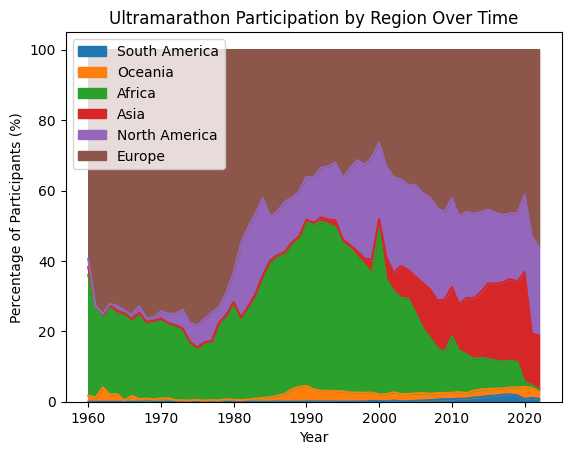

In [8]:
df_filtered = df[(df['Year of event'] >= 1960) & (df['Region'] != 'Other')]

participation_by_region = df_filtered.groupby(['Year of event', 'Region']).size().unstack()

totals = participation_by_region.sum(axis=0).sort_values()
participation_by_region = participation_by_region[totals.index]

regional_participation_percentage = participation_by_region.div(participation_by_region.sum(axis=1), axis=0) * 100

regional_participation_percentage.plot(kind='area', stacked=True)
plt.title('Ultramarathon Participation by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Participants (%)')
plt.legend(loc='upper left')
plt.show()

In [9]:
event_counts = df.groupby('Event distance/length').size()
sorted_event_counts = event_counts.sort_values(ascending=False)
sorted_event_counts.head()

Event distance/length
50km     1398820
100km     858586
50mi      340995
56km      315133
87km      205469
dtype: int64

In [10]:
def extended_time_to_minutes(time_str):
    if pd.isnull(time_str) or 'km' in time_str:
        return None
    try:
        if 'd' in time_str:
            days_part, time_part = time_str.split('d')
            days = int(days_part.strip())
        else:
            days = 0
            time_part = time_str
        
        time_part = time_part.replace(' h', '').strip()
        hours, minutes, seconds = [int(part) for part in time_part.split(':')]
        
        total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
        return total_seconds / 60
    except ValueError:
        print(f"Format error in time string: {time_str}")
        return None

df['Performance_in_minutes'] = df['Athlete performance'].apply(extended_time_to_minutes)
df

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Region,Performance_in_minutes
0,2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,10.286,South America,291.650000
1,2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,9.501,South America,315.750000
2,2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,9.472,South America,316.733333
3,2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,8.976,South America,334.216667
4,2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,8.469,South America,354.233333
...,...,...,...,...,...,...,...,...,...,...,...,...
7461188,1995,Les 24 heures de Fleurbaix (FRA),24h,2,232.810 km,NaN,FRA,1958.0,M,9700.0,Europe,NaN
7461189,1995,Les 24 heures de Fleurbaix (FRA),24h,2,221.374 km,NaN,BEL,1951.0,M,9224.0,Europe,NaN
7461192,1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,10042.0,Europe,NaN
7461193,1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,9500.0,Europe,NaN


In [11]:
fifty_km = df[df['Event distance/length'] == '50km']
fifty_km

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Region,Performance_in_minutes
0,2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,10.286,South America,291.650000
1,2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,9.501,South America,315.750000
2,2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,9.472,South America,316.733333
3,2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,8.976,South America,334.216667
4,2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,8.469,South America,354.233333
...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:19:56 h,*QLD,AUS,1956.0,F,11541.0,Oceania,259.933333
7461090,1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:28:57 h,*QLD,AUS,1954.0,M,11154.0,Oceania,268.950000
7461091,1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:46:39 h,*QLD,AUS,1951.0,M,10466.0,Oceania,286.650000
7461092,1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:47:39 h,*QLD,AUS,1939.0,M,10429.0,Oceania,287.650000


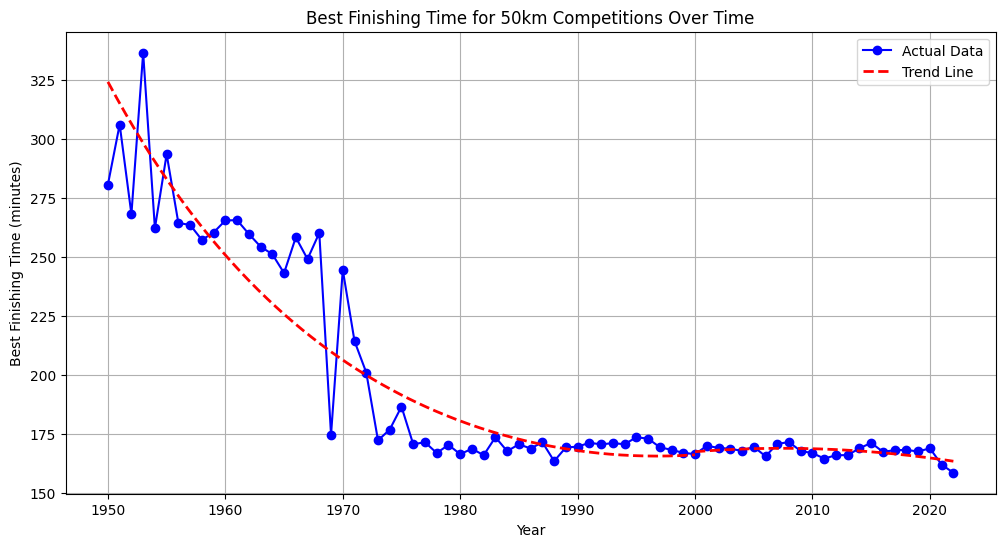

In [12]:
reasonable_performance_threshold_fifty_km = 150
fifty_km_filtered = fifty_km[fifty_km['Performance_in_minutes'] > reasonable_performance_threshold_fifty_km]
best_performance_fifty_km = fifty_km_filtered.groupby('Year of event')['Performance_in_minutes'].min()

best_performance_fifty_km = best_performance_fifty_km[best_performance_fifty_km.index >= 1950]

x = best_performance_fifty_km.index.values
y = best_performance_fifty_km.values



# Piecewise fit a polynomial regression model to the filtered data

# 1950 - 2000
filtered_data = best_performance_fifty_km[(best_performance_fifty_km.index >= 1950) & (best_performance_fifty_km.index <= 2000) ]

x_filtered = filtered_data.index.values
y_filtered = filtered_data.values

# Coefficients for the polynomial fit
p_filtered = np.polyfit(x_filtered, np.log(y_filtered), 2)

x2_filtered = np.linspace(x_filtered.min(), x_filtered.max(), 200)
y2_filtered = np.exp(np.polyval(p_filtered, x2_filtered))


# 2000 onwards
filtered_data_2 = best_performance_fifty_km[(best_performance_fifty_km.index >= 2000)]

x_filtered_2 = filtered_data_2.index.values
y_filtered_2 = filtered_data_2.values

# Coefficients for the polynomial fit
p_filtered_2 = np.polyfit(x_filtered_2, np.log(y_filtered_2), 2)

x2_filtered_2 = np.linspace(x_filtered_2.min(), x_filtered_2.max(), 200)
y2_filtered_2 = np.exp(np.polyval(p_filtered_2, x2_filtered_2))


plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Actual Data')

# Plot the trend line starting from 1960
plt.plot(x2_filtered, y2_filtered, color='red', linewidth=2, linestyle='--', label='Trend Line')
plt.plot(x2_filtered_2, y2_filtered_2, color='red', linewidth=2, linestyle='--')

plt.title('Best Finishing Time for 50km Competitions Over Time')
plt.xlabel('Year')
plt.ylabel('Best Finishing Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
hun_km = df[df['Event distance/length']=='100km']
hun_km

,Year of event,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Region,Performance_in_minutes
1039,2018,Extreme North Dakota Sandhills Ultra Run Exper...,100km,3,17:20:00 h,NaN,USA,1979.0,M,5.769,North America,1040.000000
1040,2018,Extreme North Dakota Sandhills Ultra Run Exper...,100km,3,18:29:00 h,NaN,CAN,1983.0,M,5.41,North America,1109.000000
1041,2018,Extreme North Dakota Sandhills Ultra Run Exper...,100km,3,20:35:00 h,NaN,USA,1987.0,F,4.858,North America,1235.000000
4657,2018,Endurance Day Hamme 100 km (BEL),100km,6,8:40:06 h,NaN,BEL,1970.0,M,11.536,Europe,520.100000
4658,2018,Endurance Day Hamme 100 km (BEL),100km,6,9:51:22 h,NaN,BEL,1979.0,M,10.146,Europe,591.366667
...,...,...,...,...,...,...,...,...,...,...,...,...
7460924,1995,100 km de Rognonas (FRA),100km,94,12:25:27 h,Courir Ensemble Sncf,FRA,1942.0,M,8049.0,Europe,745.450000
7460925,1995,100 km de Rognonas (FRA),100km,94,13:12:46 h,SGW Stuttgart,GER,1940.0,M,7568.0,Europe,792.766667
7460926,1995,100 km de Rognonas (FRA),100km,94,13:59:44 h,NaN,FRA,1941.0,M,7145.0,Europe,839.733333
7460928,1995,100 km de Rognonas (FRA),100km,94,14:01:36 h,NaN,SUI,1945.0,M,7129.0,Europe,841.600000


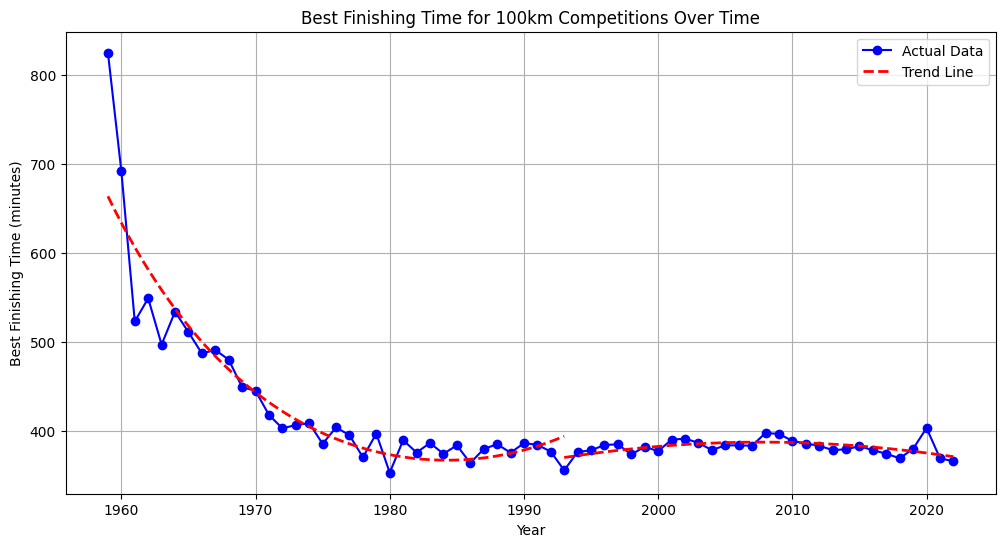

In [14]:
reasonable_performance_threshold_hun_km = 350
hun_km_filtered = hun_km[(hun_km['Year of event'] > 1956) & (hun_km['Performance_in_minutes'] > reasonable_performance_threshold_hun_km)]
best_performance_hun_km = hun_km_filtered.groupby('Year of event')['Performance_in_minutes'].min()

# Piecewise fit a polynomial regression model to the filtered data

# before 1993
filtered_data_3 = best_performance_hun_km[(best_performance_hun_km.index <= 1993) ]

x_filtered_3 = filtered_data_3.index.values
y_filtered_3 = filtered_data_3.values

# Coefficients for the polynomial fit
p_filtered_3 = np.polyfit(x_filtered_3, np.log(y_filtered_3), 2)

x2_filtered_3 = np.linspace(x_filtered_3.min(), x_filtered_3.max(), 200)
y2_filtered_3 = np.exp(np.polyval(p_filtered_3, x2_filtered_3))


# After 1993
filtered_data_4 = best_performance_hun_km[(best_performance_hun_km.index >= 1993)]

x_filtered_4 = filtered_data_4.index.values
y_filtered_4 = filtered_data_4.values

# Coefficients for the polynomial fit
p_filtered_4 = np.polyfit(x_filtered_4, np.log(y_filtered_4), 2)

x2_filtered_4 = np.linspace(x_filtered_4.min(), x_filtered_4.max(), 200)
y2_filtered_4 = np.exp(np.polyval(p_filtered_4, x2_filtered_4))


plt.figure(figsize=(12, 6))
plt.plot(best_performance_hun_km.index, best_performance_hun_km, marker='o', linestyle='-', color='blue', label='Actual Data')

plt.plot(x2_filtered_3, y2_filtered_3, color='red', linewidth=2, linestyle='--', label='Trend Line')
plt.plot(x2_filtered_4, y2_filtered_4, color='red', linewidth=2, linestyle='--')

plt.title('Best Finishing Time for 100km Competitions Over Time')
plt.xlabel('Year')
plt.ylabel('Best Finishing Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Creating a new df for 2010 USA Distance Event with candidates finished in less than 1200 minutes

df_new = df[df['Year of event'] == 2010]
df_new = df_new[df_new['Event name'].str.contains('USA', na=False)]
df_new = df_new[df_new['Event distance/length'].str.contains('km|mi', na=False) & ~df_new['Event distance/length'].str.contains('Etappen', na=False)]

pattern = r'^\d+(\.\d+)?(km|mi|mile)$'
df_new.loc[~df_new['Event distance/length'].str.contains(pattern, na=False, regex=True), 'Event distance/length'] = np.nan

def convert_to_km(distance_str):
    if pd.isnull(distance_str):
        return np.nan
    elif 'mi' in distance_str or 'mile' in distance_str:
        numeric_part = float(distance_str.replace('mile', '').replace('mi', ''))
        return numeric_part * 1.60934 
    else:
        return float(distance_str.replace('km', ''))

df_new['Event distance'] = df_new['Event distance/length'].apply(convert_to_km)

df_new['Have_club'] = df_new['Athlete club'].notna().astype(int)

df_new = df_new[df_new['Region'] != 'Other']
df_new = pd.concat([df_new, pd.get_dummies(df_new['Region'])], axis=1)

df_new['Gender'] = (df_new['Athlete gender'] == 'M').astype(int)

df_new['Athlete age'] = df_new['Year of event'] - df_new['Athlete year of birth']

df_new = df_new[['Event distance','Athlete age','Africa','Asia','Europe','North America','Oceania','South America','Have_club','Gender','Performance_in_minutes']]
df_new = df_new.dropna()

df_new = df_new[df_new['Performance_in_minutes'] < 1200]

df_new

/var/folders/zd/6f7f1lpd4l322t46rnrxl9580000gn/T/ipykernel_72497/3790803581.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_new.loc[~df_new['Event distance/length'].str.contains(pattern, na=False, regex=True), 'Event distance/length'] = np.nan


,Event distance,Athlete age,Africa,Asia,Europe,North America,Oceania,South America,Have_club,Gender,Performance_in_minutes
4836295,80.467,43.0,0,0,0,1,0,0,1,1,429.633333
4836296,80.467,35.0,0,0,0,1,0,0,1,1,434.250000
4836297,80.467,20.0,0,0,0,1,0,0,1,1,442.866667
4836298,80.467,35.0,0,0,0,1,0,0,1,1,513.983333
4836299,80.467,38.0,0,0,0,1,0,0,1,1,535.100000
...,...,...,...,...,...,...,...,...,...,...,...
5041725,80.467,44.0,0,0,0,1,0,0,1,1,797.933333
5041726,80.467,62.0,0,0,0,1,0,0,1,1,799.300000
5041727,80.467,63.0,0,0,0,1,0,0,1,0,799.800000
5041728,80.467,65.0,0,0,0,1,0,0,1,1,875.983333


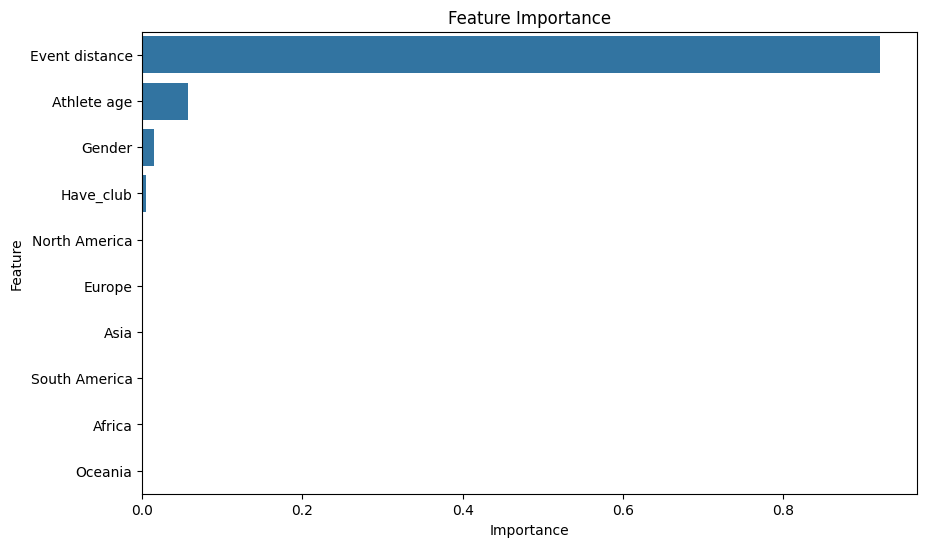

(0.6887579535519932,
 74.48497499942111,
           Feature  Importance
 0  Event distance    0.921351
 1     Athlete age    0.056482
 9          Gender    0.014459
 8       Have_club    0.004840
 5   North America    0.001151
 4          Europe    0.000990
 3            Asia    0.000371
 7   South America    0.000158
 2          Africa    0.000109
 6         Oceania    0.000091)

In [16]:
# Splitting the dataset into features and target
X = df_new.drop(['Performance_in_minutes'], axis=1)
y = df_new['Performance_in_minutes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

(r2, mae, sorted_feature_importance)

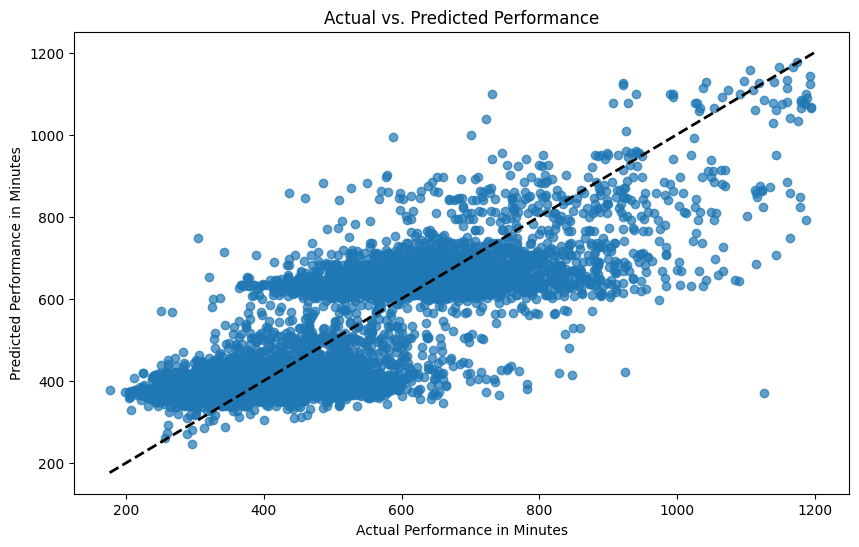

In [17]:
# Plotting Actual vs. Predicted Performance in Minutes
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('Actual Performance in Minutes')
plt.ylabel('Predicted Performance in Minutes')
plt.title('Actual vs. Predicted Performance')
plt.show()

<Figure size 1000x600 with 0 Axes>

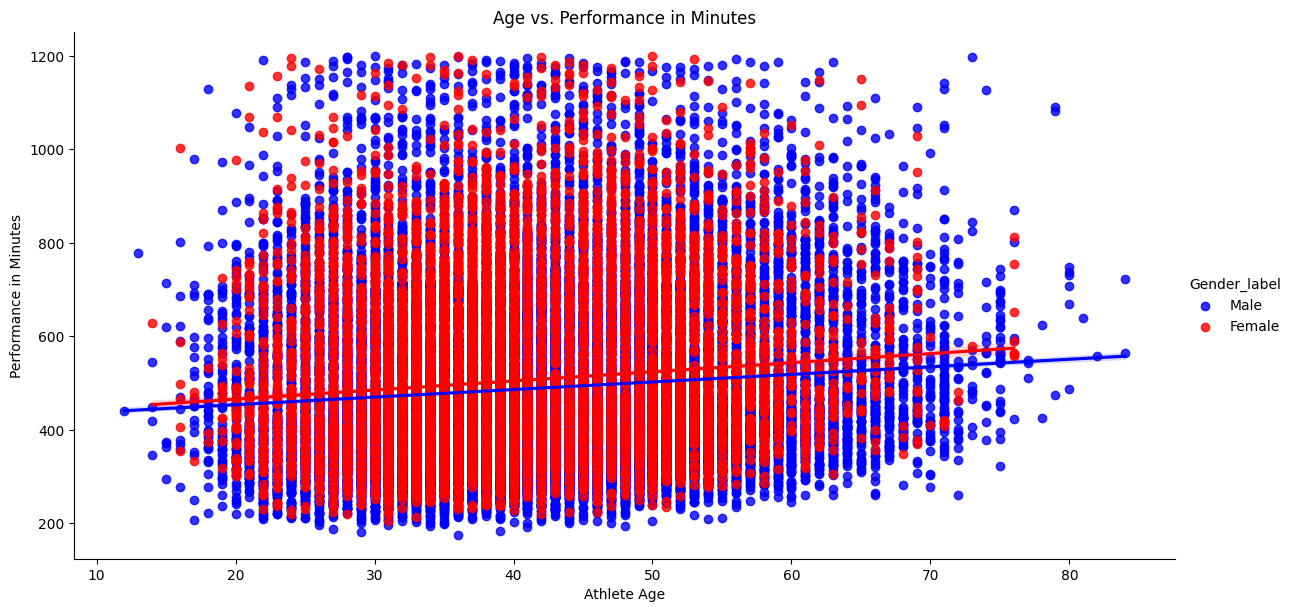

In [18]:
df_new['Gender_label'] = df_new['Gender'].map({0: 'Female', 1: 'Male'})
plt.figure(figsize=(10, 6))
sns.lmplot(x='Athlete age', y='Performance_in_minutes', data=df_new, hue='Gender_label', aspect=2, height=6, palette=['blue', 'red'])
plt.title('Age vs. Performance in Minutes')
plt.xlabel('Athlete Age')
plt.ylabel('Performance in Minutes')
plt.show()